# Extreme Heat Hazard

This notebook calculates the urban risk index for Extreme heat (EXH) hazard.  
The URI calculation has three components: expected loss, social vulnerability, and resilience capacity.  

## 1. Expected Loss
The EXH hazard expected loss (EL) includes consequences for the following receptors and marginal losses.
 * People/ excess deaths

#### 1a. People / excess deaths
The HH&C database was used to estimate the number of heat event that occur per year in each borough.  
This information was  downscaled to the census tract level.
The median number of excess deaths due to extreme heat per year was determined to be 121 (Matte et al 2016).
The deaths were distributed evenly across the continent.  

Finished calculating EXH event rate in 0.2 minutes.
Finished calculating EXH death rate.
Finished calculating EXH loss due to excess deaths.


Text(0.5, 1.0, 'USD Losses due to Extreme Heat Events')

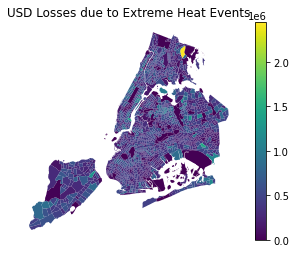

In [7]:
from MISC import params_1 as params
from MISC import utils_1 as utils
import matplotlib.pyplot as plt
import os
utils.set_home()

#calculate heat events per year
script_name = '.\\4_CODE\DATA_PROCESSING\EXH_ESL_frequency_1.py'
exec(open(script_name).read())

#calculate heat deaths per event
script_name = '.\\4_CODE\DATA_PROCESSING\EXH_ESL_death_rate_1.py'
exec(open(script_name).read())

#calculate losses per year
script_name = '.\\4_CODE\DATA_PROCESSING\EXH_ESL_death_loss_1.py'
exec(open(script_name).read())

#plot results
path_events_per_year =   params.PATHNAMES.at['EXH_ESL_deaths_per_year_tract', 'Value']
gdf_events_per_year = gpd.read_file(path_events_per_year)
gdf_events_per_year.plot(column = 'deaths_los', legend=True )
plt.axis('off')
plt.title('USD Losses due to Extreme Heat Deaths')

  The 